In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
import pandas as pd

# Try with a different encoding
df = pd.read_csv('C:/Users/spiralroot777/Desktop/Projects/Election-prediction/eci_data_2024.csv', encoding='ISO-8859-1')

# View the first few rows
df.head()



,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency
0,1,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
1,2,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
2,3,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
3,4,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1
4,5,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1


In [ ]:
# List all column names
df.columns.tolist()


['S.N',
 'Candidate',
 'Party',
 'EVM Votes',
 'Postal Votes',
 'Total Votes',
 '% of Votes',
 'State',
 'Constituency']

In [ ]:
# Convert Total Votes to numeric (handle any commas or errors)
df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')

# Drop rows where Total Votes is missing
df = df.dropna(subset=['Total Votes'])

# Create binary target column: 1 if candidate got max votes in their constituency
#df['Won'] = df.groupby('Constituency')['Total Votes'].transform(lambda x: x == x.max()).astype(int)
df.loc[:, 'Won'] = df.groupby('Constituency')['Total Votes'].transform(lambda x: x == x.max()).astype(int)

# Check how many winners (1) and losers (0)
df['Won'].value_counts()



Won
0.0    8359
1.0     542
Name: count, dtype: int64

In [ ]:
features = ['Party', '% of Votes']
target = 'Won'

df_model = df[features + [target]].dropna()

# View a few rows
df_model.head()


,Party,% of Votes,Won
0,Bharatiya Janata Party,50.58,1.0
1,Indian National Congress,38.54,0.0
2,Andaman Nicobar Democratic Congress,4.08,0.0
3,Communist Party of India (Marxist),2.97,0.0
4,Independent,1.09,0.0


In [ ]:
X = df_model.drop('Won', axis=1)
y = df_model['Won']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_features = ['Party']
numerical_features = ['% of Votes']  # Ensure this is numeric

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])



In [ ]:
from xgboost import XGBClassifier

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))  # removed use_label_encoder
])
model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Accuracy: 0.9842784952274003

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1673
         1.0       0.90      0.83      0.87       108

    accuracy                           0.98      1781
   macro avg       0.94      0.91      0.93      1781
weighted avg       0.98      0.98      0.98      1781



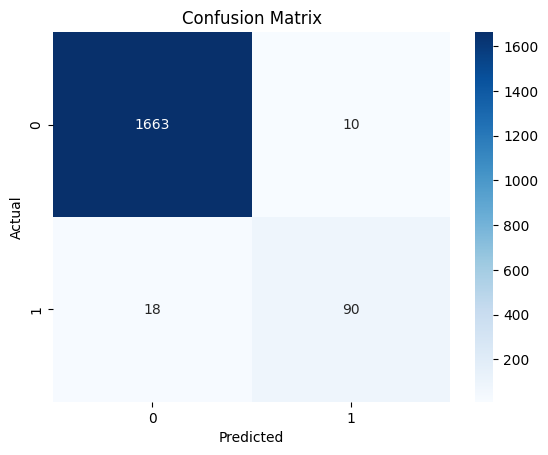

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Define columns based on your dataset
categorical_features = ['Party']
numerical_features = ['% of Votes']

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Base pipeline (without parameters yet)
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])


In [ ]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0]
}


In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'classifier__learning_rate': [0.05, 0.1, ...], 'classifier__max_depth': [3, 5, ...], 'classifier__n_estimators': [100, 200], 'classifier__subsample': [0.8, 1.0]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


Best Parameters:
 {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}

Best F1 Score from CV: 0.8443688407424617

Test Set Accuracy: 0.9859629421673217

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1673
         1.0       0.91      0.85      0.88       108

    accuracy                           0.99      1781
   macro avg       0.95      0.92      0.94      1781
weighted avg       0.99      0.99      0.99      1781



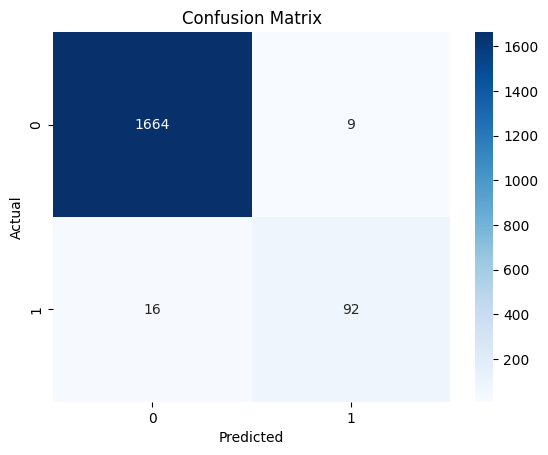

In [ ]:
print("Best Parameters:\n", grid_search.best_params_)
print("\nBest F1 Score from CV:", grid_search.best_score_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import joblib
joblib.dump(best_model, "best_election_model.pkl")


['best_election_model.pkl']

In [ ]:
# Predict on full dataset (or a copy if needed)
df['Predicted_Won'] = best_model.predict(df[['Party', '% of Votes']])


In [ ]:
# Show predicted winners
winners_df = df[df['Predicted_Won'] == 1]

# Show sample results
winners_df[['Candidate', 'Party', 'State', 'Constituency', '% of Votes']]


,Candidate,Party,State,Constituency,% of Votes
0,BISHNU PADA RAY,Bharatiya Janata Party,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,50.58
13,G M HARISH (BALAYOGI),Telugu Desam,Andhra Pradesh,Amalapuram (SC) - 7,61.25
29,C.M.RAMESH,Bharatiya Janata Party,Andhra Pradesh,Anakapalle - 5,57.5
45,AMBICA G LAKSHMINARAYANA VALMIKI,Telugu Desam,Andhra Pradesh,Ananthapur - 19,53.33
81,KRISHNA PRASAD TENNETI,Telugu Desam,Andhra Pradesh,Bapatla (SC) - 15,55.16
...,...,...,...,...,...
8804,AGNIMITRA PAUL,Bharatiya Janata Party,West Bengal,Medinipur - 34,45.56
8859,JAGANNATH SARKAR,Bharatiya Janata Party,West Bengal,Ranaghat - 13,50.78
8867,KALYAN BANERJEE,All India Trinamool Congress,West Bengal,Srerampur - 27,45.65
8879,ABHIJIT GANGOPADHYAY,Bharatiya Janata Party,West Bengal,Tamluk - 30,48.54


In [ ]:
# Predict probabilities for better filtering
probs = best_model.predict_proba(df[['Party', '% of Votes']])[:, 1]
df['Win_Prob'] = probs

# Sort by probability and get top candidate per constituency
predicted_winners = df.sort_values(by='Win_Prob', ascending=False)\
                      .groupby('Constituency')\
                      .first()\
                      .reset_index()

predicted_winners[['Constituency', 'Candidate', 'Party', 'State', 'Win_Prob']]


,Constituency,Candidate,Party,State,Win_Prob
0,AJMER - 13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,Rajasthan,0.988584
1,ALWAR - 8,BHUPENDER YADAV,Bharatiya Janata Party,Rajasthan,0.988584
2,AMBALA - 1,VARUN CHAUDHRY,Indian National Congress,Haryana,0.984834
3,ANANTNAG-RAJOURI - 3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,Jammu and Kashmir,0.989133
4,ARAKKONAM - 7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,Tamil Nadu,0.989133
...,...,...,...,...,...
537,Wardha - 8,AMAR SHARADRAO KALE,Nationalist Congress Party  Sharadchandra Pawar,Maharashtra,0.989133
538,Wayanad - 4,RAHUL GANDHI,Indian National Congress,Kerala,0.984834
539,West Delhi - 6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,NCT OF Delhi,0.988584
540,Yavatmal- Washim - 14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),Maharashtra,0.989133


In [ ]:
predicted_winners.to_excel("Predicted_Election_Winners.xlsx", index=False)
